Loss: 0.79


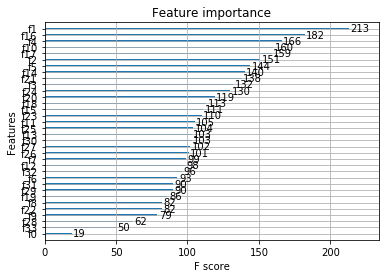

In [13]:
import xgboost as xgb
import numpy as np
import pandas as pd
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# 读取文件原始数据
data = []
labels = []
labels2 = []
df = pd.read_csv('D:/d_train.csv',encoding='gbk')
#print(df.ix[3])
#with open('D:/d_train.csv', encoding='gbk') as fileObject:
    #for line in fileObject:
        #line_split = line.split(',')
        #print(line_split)
        #data.append(line_split[2:40])
        #print(data)
        #labels.append(line_split[41])
#print(data[1])
#data_x = []
#for row in data:
   #row = [float(x) for x in row]
   #data_x.append(row)

#data_y = [float(x) for x in labels]

data_x = df.values[:,0:-1]
data_y = df.values[:,-1]
#print(data_x)
#print(data_y)
# XGBoost训练过程
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=2)

#print(X_test)

params = {
   'booster': 'gbtree',
   'objective': 'reg:gamma',
   'gamma': 0.1,
   'max_depth': 6,
   'lambda': 3,
   'subsample': 0.7,
   'colsample_bytree': 0.8,
   'min_child_weight': 0.8,
   'silent': 1,
   'eta': 0.1,
   'seed': 1000,
   'nthread': 4,
}

dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 300
plst = params.items()
model = xgb.train(plst, dtrain, num_rounds)


# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

loss_sum = 0;
for i in range(len(y_test)):
    loss_sum += np.square(ans[i] - y_test[i])

#print(ans[34:44])
#print(y_test[34:44])
    
print('Loss: %.2f' % (loss_sum/(2*len(y_test))))

# 显示重要特征
plot_importance(model)
plt.show()

In [3]:
data_test = pd.read_csv('D:/d_test_A_20180102.csv',encoding='gbk')
data_test_v = data_test.values[:,:]
#print(data_test_v)
for i in range(len(data_test_v)):
    if(data_test_v[i][0] == "男"):
        data_test_v[i][0] = 1
    elif(data_test_v[i][0] == "女"):
        data_test_v[i][0] = 0
print((data_test_v))
# 对测试集进行预测
d_test = xgb.DMatrix(data_test_v)
ans_test = model.predict(d_test)

result = []
for i in range(len(ans_test)):
    result.append(round(ans_test[i],3))
print(result)

#字典中的key值即为csv中列名
dataframe_test = pd.DataFrame({'预测值':result})

#将DataFrame存储为csv,index表示是否显示行名，default=True
dataframe_test.to_csv("D:/d_predict.csv",index=False,sep=',')

[[1 54 23.85 ..., 7.5 0.6 0.3]
 [1 50 29.75 ..., 7.7 3.2 0.5]
 [1 27 nan ..., 7.9 1.2 0.6]
 ..., 
 [1 79 18.5 ..., 11.2 1.5 0.5]
 [0 39 26.15 ..., 5.7 0.7 0.6]
 [0 57 nan ..., 8.0 4.8 0.4]]
[6.0019999, 5.671, 5.348, 5.7610002, 5.0229998, 5.1069999, 5.2470002, 5.362, 5.9549999, 5.6589999, 4.9559999, 5.1609998, 5.5710001, 5.4650002, 6.8460002, 5.3039999, 5.3660002, 6.0229998, 4.8470001, 5.7080002, 4.941, 5.7529998, 6.6389999, 6.1129999, 5.809, 5.1500001, 5.2410002, 5.744, 5.3200002, 5.5159998, 5.053, 5.8860002, 5.5419998, 8.7559996, 5.7150002, 4.8369999, 5.2969999, 5.1690001, 5.2930002, 5.902, 5.8649998, 5.7490001, 4.9650002, 5.4299998, 5.9949999, 6.1500001, 5.4910002, 5.0760002, 4.9039998, 5.4450002, 5.02, 5.0, 4.9050002, 4.8179998, 4.8390002, 4.8590002, 5.0279999, 4.803, 4.8579998, 4.9879999, 5.5229998, 5.1259999, 6.1259999, 5.1020002, 5.0749998, 4.9899998, 5.059, 4.9559999, 5.7270002, 5.7119999, 6.552, 6.1669998, 5.7090001, 5.1880002, 5.941, 5.2049999, 5.7490001, 5.7259998, 6.9489999,